In [1]:
import pandas as pd
import openpyxl
import numpy as np
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist
import copy
import os
import sys

In [2]:
# args=sys.argv
# gramnumber=int(args[1])
# gramname=str(args[1])

In [3]:
currentpath=os.getcwd()
basepath=currentpath.split("/")
basepath="/".join(basepath[0:basepath.index("test")+1])+"/data/ryukyu4/{}"

In [4]:
dORe=int(input("発音構造か発音変化か：0,1"))
gnumber=int(input("グラム数の指定"))
porder=int(input("パターンの入力：all=0,cvc=1,vcv=2"))

発音構造か発音変化か：0,11
グラム数の指定2
パターンの入力：all=0,cvc=1,vcv=20


In [5]:
if dORe==0:
    dORe="E"
    pattern="conuter"
elif dORe==1:
    dORe="D"
    pattern="pattern"

In [6]:
if porder==0:
    porder="all"
    porder2="A"
elif porder==1:
    porder="cvc"
    porder2="C"
elif porder==2:
    porder="vcv"
    porder2="V"

In [7]:
rflocate = basepath.format("parameter/locations.xlsx")
rfword   = basepath.format("parameter/sheetlist.xlsx")
rfpattern= basepath.format("gram{}/{}/{}.xlsx").format(gnumber,pattern,porder)
picpath=basepath.format("/pic/{}")

In [8]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
wordDf  = pd.read_excel(rfword , sheet_name=0, header=0, index_col=0)

In [9]:
symbols=list(locateDf.iloc[:,0])
locates = list(locateDf.iloc[:,2])
hyouzi = list(locateDf.iloc[:,1])
words   = list(wordDf.iloc[:,0])

In [10]:
ptDf=pd.read_excel(rfpattern, sheet_name=0, header=0, index_col=0)

In [11]:
len(ptDf.index.str.contains('-9'))

12022

In [12]:
nonind=ptDf.index.str.contains('-9')
# ptDf=ptDf.loc[~nonind,:]
ptDf=ptDf.T
distanceMatrix=np.array(ptDf.values)

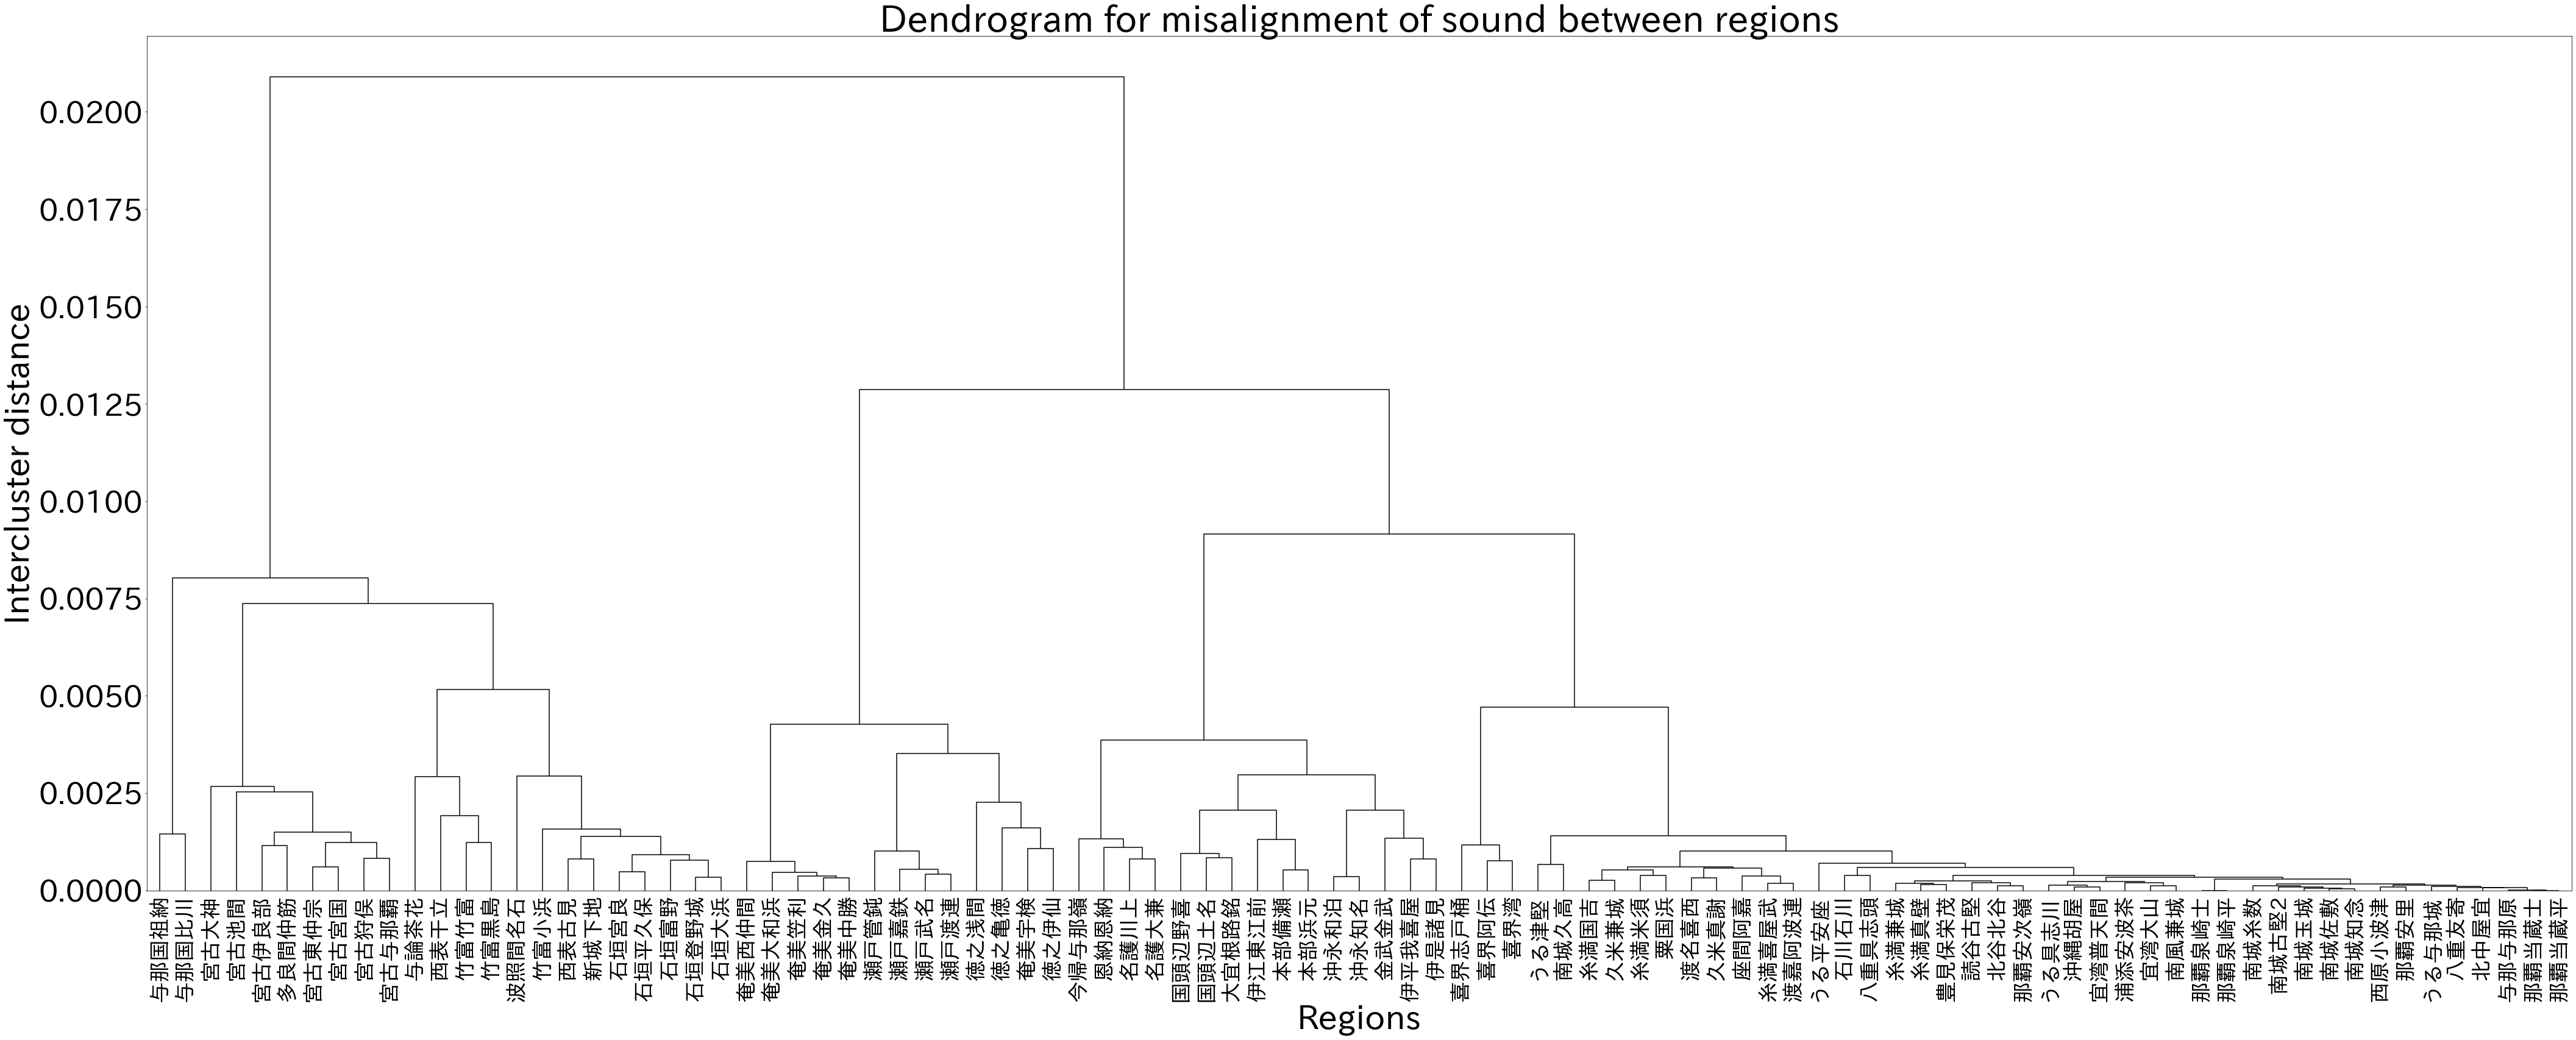

In [13]:
#図の生成
figtitle='Dendrogram for misalignment of sound between regions'
himethod='ward'
# savefile=basepath.format("gramTri/pic/dendAD.png")
pdis=dist.pdist(distanceMatrix,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
# plt.savefig(savefile)
plt.show()
plt.close()

In [14]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.ix[i][0])
        n2 = int(df1.ix[i][1])
        val = df1.ix[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [15]:
labels=get_cluster_by_number(z,6)

/Users/qvel/.pyenv/versions/anaconda3-5.3.1/envs/language/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/qvel/.pyenv/versions/anaconda3-5.3.1/envs/language/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/qvel/.pyenv/versions/anaconda3-5.3.1/envs/language/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pyda

In [16]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5]


In [17]:
wfile=basepath.format("gram{}/{}/{}Label2.xlsx").format(gnumber,pattern,porder)
with pd.ExcelWriter(wfile, engine='openpyxl') as writer:
    wdf=pd.DataFrame(labels)
    wdf.to_excel(writer,sheet_name="ラベル") #シート名[地点名]